## Appendix 1 - Python Code and Outputs

### Data Preparation

In [1]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

### Import Data

In [2]:
import pandas as pd
titanic_training_data = pd.read_csv('train.csv')

# show first five rows of the data
titanic_training_data.head(100)
# show number of columns and rows
titanic_training_data.shape

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
95,96,0,3,"Shorney, Mr. Charles Joseph",male,NaN,0,0,374910,8.0500,NaN,S
96,97,0,1,"Goldschmidt, Mr. George B",male,71.0,0,0,PC 17754,34.6542,A5,C
97,98,1,1,"Greenfield, Mr. William Bertram",male,23.0,0,1,PC 17759,63.3583,D10 D12,C
98,99,1,2,"Doling, Mrs. John T (Ada Julia Bone)",female,34.0,0,1,231919,23.0000,NaN,S


(891, 12)

#### Variable Key Guide:

| Variable name | Variable label | Variable value and value label | Variable type |
| :-: | :-: | :-: | :-: |
| PassengerID | Passenger ID | | Numerical |
| Survived | Did the passenger survive? | 0 = No, 1 = Yes | Indicator, dichotomous |
| Pclass | Ticket class | 1 = 1st, 2 = 2nd, 3 = 3rd | Categorical, or ordinal |
| Name | Passenger name | | String |
| Sex | Passenger's sex | Male, Female | Categorical or indicator |
| Age | Passenger's age | | Numerical |
| Sibsp | # of siblings / spouses aboard the Titanic | | Numerical | 
| Parch | # of parents / children aboard the Titanic | | Nmerical |
| Ticket | Ticket number | | String |
| Fare | Passenger fare | | Numerical, continuous |
| Cabin | Cabin number | | Categorical |
| Embarked | Port of embarkation | C = Cherbourg, Q = Queenstown, S = Southampton | Categorical |

### Exploratory Data Analysis

First, we can categorize each variable as either an indicator variable, multi-category categorical variable, or numeric variable.  Then we can proceed in our exploratory data analysis by constructing the appropriate visualization for each type of variable.

,Age,Fare,SibSp,Parch
count,714.000000,891.000000,891.000000,891.000000
mean,29.699118,32.204208,0.523008,0.381594
std,14.526497,49.693429,1.102743,0.806057
min,0.420000,0.000000,0.000000,0.000000
25%,20.125000,7.910400,0.000000,0.000000
50%,28.000000,14.454200,0.000000,0.000000
75%,38.000000,31.000000,1.000000,0.000000
max,80.000000,512.329200,8.000000,6.000000


array([[<Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'Fare'}>],
       [<Axes: title={'center': 'SibSp'}>,
        <Axes: title={'center': 'Parch'}>]], dtype=object)

<Axes: title={'center': 'Pclass'}>

<Axes: title={'center': 'Embarked'}>

<Axes: title={'center': 'Cabin'}>

<Axes: title={'center': 'Sex'}>

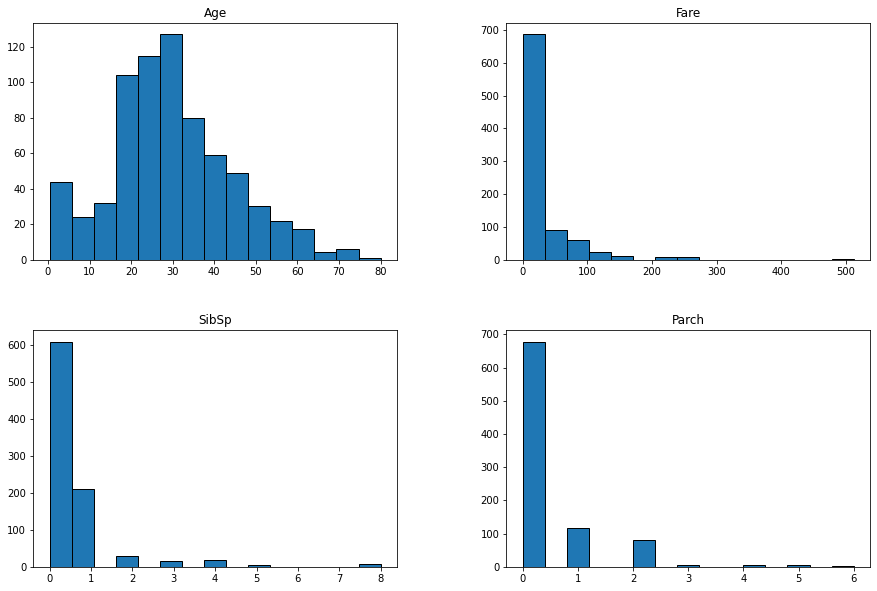

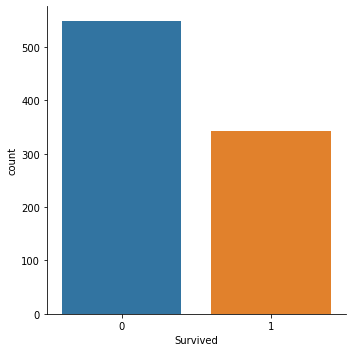

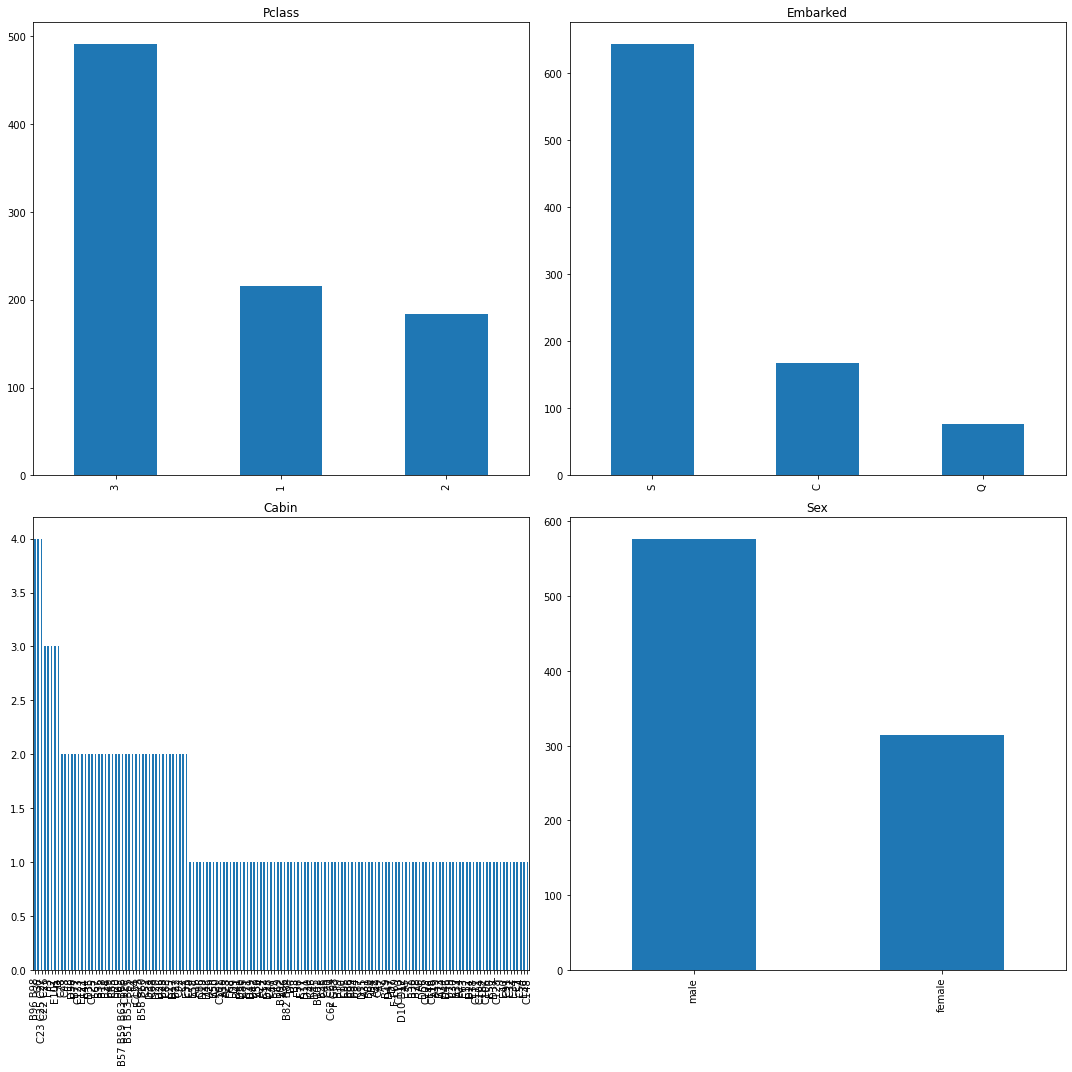

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

numeric_variables = ['Age', 'Fare', 'SibSp', 'Parch']

indicator_variables = ['Survived']

categorical_variables = ['Pclass', 'Embarked', 'Cabin', 'Sex']

# Numeric Variable Visualizations
titanic_training_data[numeric_variables].describe()

titanic_training_data[numeric_variables].hist(edgecolor = 'black', 
                                             bins = 15, figsize = (15, 10),
                                             layout = (2, 2), grid = False)


# Indicator Variable Visualizations
sns.catplot(x = 'Survived', kind = 'count', data = titanic_training_data)


# Categorical Variable Visualizations
fig, ax = plt.subplots(2, 2, figsize = (15, 15))
for var, subplot in zip(categorical_variables, ax.flatten()):
    titanic_training_data[var].value_counts().plot(kind = 'bar', ax = subplot, title = var)

fig.tight_layout()





### Investigation of Missing Data and Outliers

In [4]:
# find null counts, percentage of null values, and column type
null_count = titanic_training_data.isnull().sum()
null_percentage = titanic_training_data.isnull().sum() * 100 / len(titanic_training_data)
column_type = titanic_training_data.dtypes

# show null counts, percentage of null values, and column type for columns with more than one Null value
null_summary = pd.concat([null_count, null_percentage, column_type], axis=1, keys=['Missing Count', 'Percentage Missing','Column Type'])
null_summary_only_missing = null_summary[null_count != 0].sort_values('Percentage Missing',ascending=False)
null_summary_only_missing

,Missing Count,Percentage Missing,Column Type
Cabin,687,77.104377,object
Age,177,19.865320,float64
Embarked,2,0.224467,object


Let's address the missing data appropriately in a new dataframe that we'll name titanic_training_data_cleaned.

In [5]:
# Create a new dataframe called titanic_training_data_cleaned so we don't modify the originally imported data
titanic_training_data_cleaned = titanic_training_data.copy(deep=True)

# Create new cabin-related variables that will be more useful and cleaner than the original cabin variable
titanic_training_data_cleaned['Cabin_Data_Indicator'] = titanic_training_data_cleaned['Cabin'].notna().astype(int)

# Create a variable for deck associated with the passenger's first listed cabin
titanic_training_data_cleaned['First_Cabin_Deck'] = titanic_training_data_cleaned['Cabin'].astype(str).str[0]

def conditions(s):
    if (s['First_Cabin_Deck'] == "A"):
        return 1
    elif (s['First_Cabin_Deck'] == "B"):
        return 2    
    elif (s['First_Cabin_Deck'] == "C"):
        return 3      
    elif (s['First_Cabin_Deck'] == "D"):
        return 4      
    elif (s['First_Cabin_Deck'] == "E"):
        return 5      
    elif (s['First_Cabin_Deck'] == "F"):
        return 6     
    elif (s['First_Cabin_Deck'] == "G"):
        return 7
    elif (s['First_Cabin_Deck'] == "T"):
        return 10 
    elif (s['First_Cabin_Deck'] == "n"):
        return np.nan     
    else:
        return np.nan

titanic_training_data_cleaned['Deck'] = titanic_training_data_cleaned.apply(conditions, axis=1)

# Drop the original Cabin variable since it has so many null values and since some passengers had more than one cabin
# making the original variable difficult to work with.  Drop First_Cabin_Deck as well since we're using Deck now
titanic_training_data_cleaned.drop(['Cabin', 'First_Cabin_Deck'],axis=1,inplace=True)


# Apply Imputation to Fill In Null Values for Missing Data Values
titanic_training_data_cleaned.fillna(method='ffill', inplace=True)
titanic_training_data_cleaned.fillna(method='bfill', inplace=True)

# Create a new variable indicating whether a passenger is a child
titanic_training_data_cleaned['Child_Indicator'] = titanic_training_data_cleaned['Age'] <= 17
titanic_training_data_cleaned['Child_Indicator'] = titanic_training_data_cleaned['Child_Indicator'].astype(int)



In [6]:
titanic_training_data_cleaned['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

Check the distributions of the variables in the newly cleaned dataframe.  Also, check for missing values in this new dataframe.

In [7]:
# show first five rows of the data
titanic_training_data_cleaned.head(20)
# show number of columns and rows
titanic_training_data_cleaned.shape

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Cabin_Data_Indicator,Deck,Child_Indicator
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,0,3.0,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,1,3.0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,0,3.0,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,1,3.0,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,0,3.0,0
5,6,0,3,"Moran, Mr. James",male,35.0,0,0,330877,8.4583,Q,0,3.0,0
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,S,1,5.0,0
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,S,0,5.0,1
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,S,0,5.0,0
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,C,0,5.0,1


(891, 14)

#### Variable Key Guide:

| Variable name | Variable label | Variable value and value label | Variable type |
| :-: | :-: | :-: | :-: |
| PassengerID | Passenger ID | | Numerical |
| Survived | Did the passenger survive? | 0 = No, 1 = Yes | Indicator, dichotomous |
| Pclass | Ticket class | 1 = 1st, 2 = 2nd, 3 = 3rd | Categorical |
| Name | Passenger name | | String |
| Sex | Passenger's sex | Male, Female | Categorical |
| Age | Passenger's age | | Numerical |
| Sibsp | # of siblings / spouses aboard the Titanic | | Numerical | 
| Parch | # of parents / children aboard the Titanic | | Nmerical |
| Ticket | Ticket number | | String |
| Fare | Passenger fare | | Numerical, continuous |
| Embarked | Port of embarkation | C = Cherbourg, Q = Queenstown, S = Southampton | Categorical |
| Cabin Data Indicator | Cabin number | | Indicator, dichotomuous |
| First cabin deck | In first cabin class | | Categorical |
| Child_indicator | Was a child, under 18 years old | | Indicator, dichotomuous |

In [8]:
# find null counts, percentage of null values, and column type
null_count = titanic_training_data_cleaned.isnull().sum()
null_percentage = titanic_training_data_cleaned.isnull().sum() * 100 / len(titanic_training_data)
column_type = titanic_training_data_cleaned.dtypes

# show null counts, percentage of null values, and column type for columns with more than one Null value
null_summary = pd.concat([null_count, null_percentage, column_type], axis=1, keys=['Missing Count', 'Percentage Missing','Column Type'])
null_summary_only_missing = null_summary[null_count != 0].sort_values('Percentage Missing',ascending=False)
null_summary_only_missing

,Missing Count,Percentage Missing,Column Type


,Age,Fare,SibSp,Parch
count,891.00000,891.000000,891.000000,891.000000
mean,29.58156,32.204208,0.523008,0.381594
std,14.55459,49.693429,1.102743,0.806057
min,0.42000,0.000000,0.000000,0.000000
25%,20.00000,7.910400,0.000000,0.000000
50%,28.00000,14.454200,0.000000,0.000000
75%,38.00000,31.000000,1.000000,0.000000
max,80.00000,512.329200,8.000000,6.000000


array([[<Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'Fare'}>],
       [<Axes: title={'center': 'SibSp'}>,
        <Axes: title={'center': 'Parch'}>]], dtype=object)

<Axes: title={'center': 'Pclass'}>

<Axes: title={'center': 'Embarked'}>

<Axes: title={'center': 'Deck'}>

<Axes: title={'center': 'Sex'}>

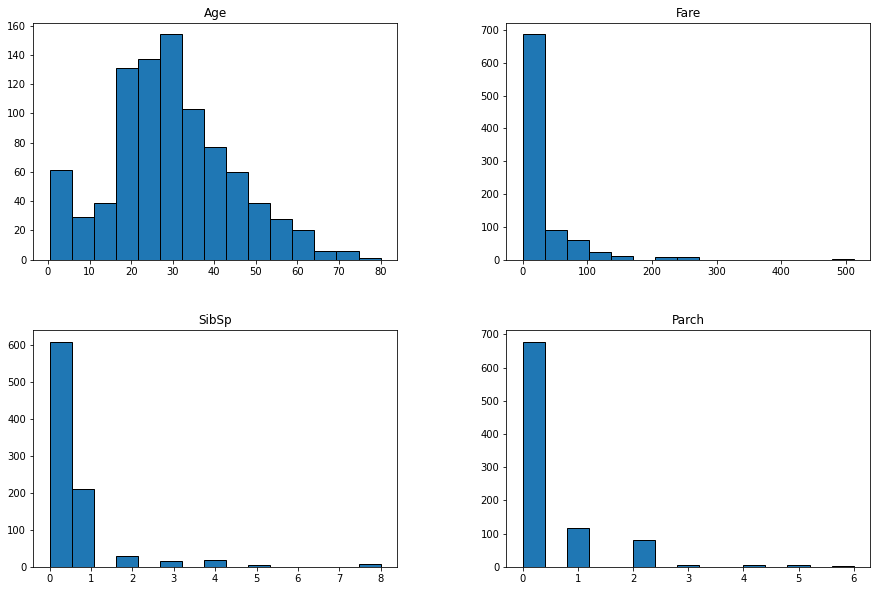

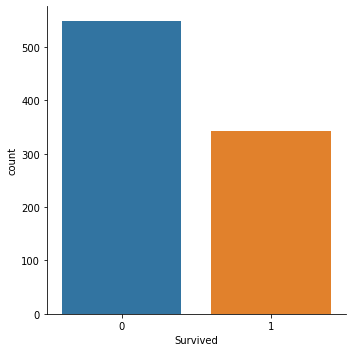

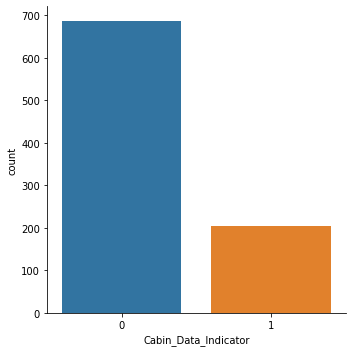

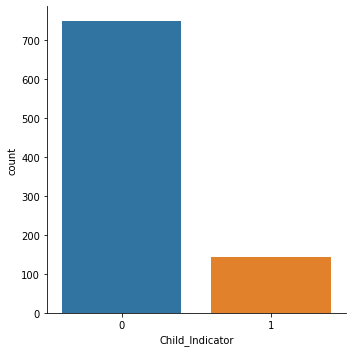

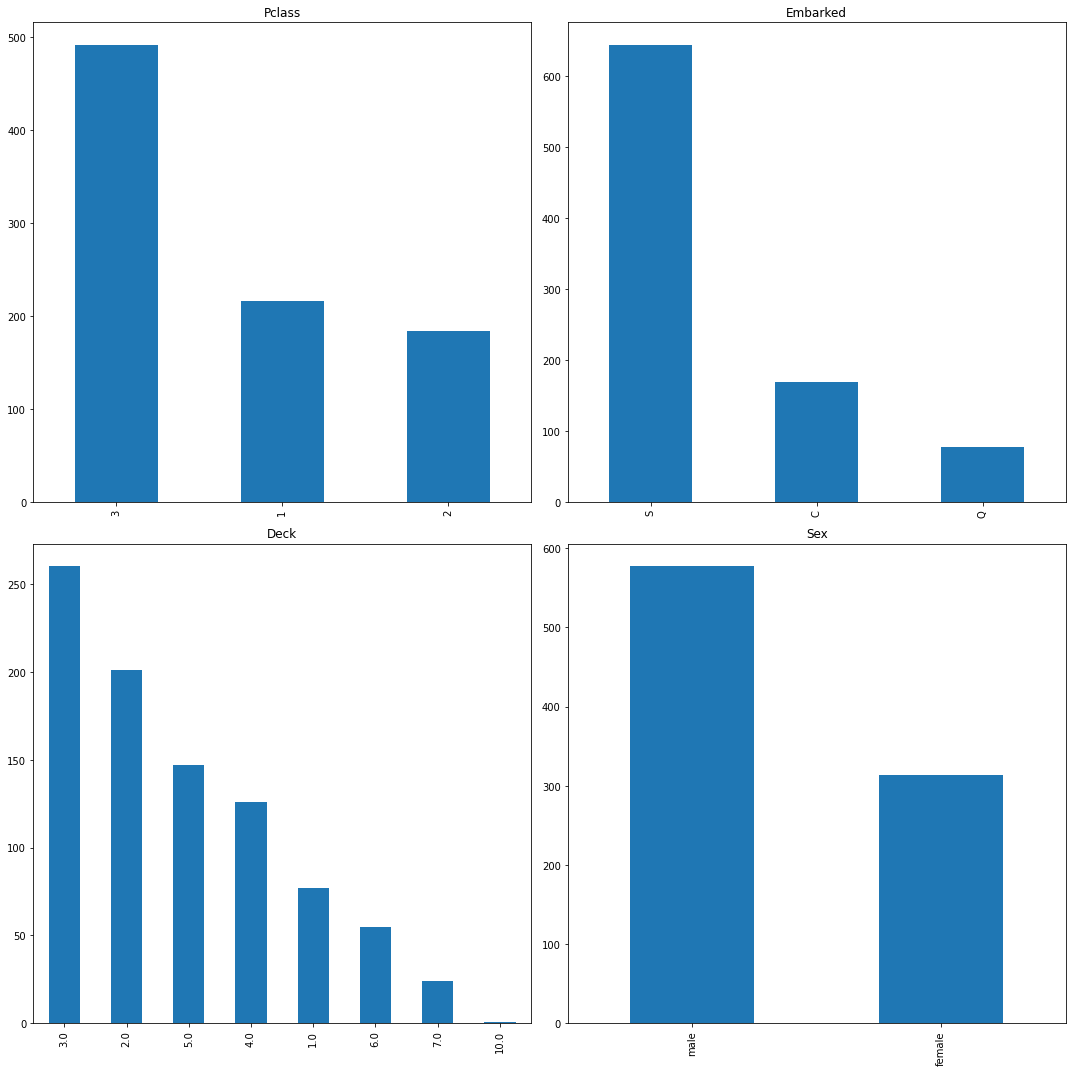

In [9]:
# Update our definitions of the indicator, numeric, and categorical variables to reflect our newly created variables
numeric_variables = ['Age', 'Fare', 'SibSp', 'Parch']

indicator_variables = ['Survived', 'Cabin_Data_Indicator', 'Child_Indicator']

categorical_variables = ['Pclass', 'Embarked', 'Deck', 'Sex']

# Numeric Variable Visualizations
titanic_training_data_cleaned[numeric_variables].describe()

titanic_training_data_cleaned[numeric_variables].hist(edgecolor = 'black', 
                                             bins = 15, figsize = (15, 10),
                                             layout = (2, 2), grid = False)

# Indicator Variable Visualizations

for var, subplot in zip(indicator_variables, ax.flatten()):
    sns.catplot(x = var, kind = 'count', data = titanic_training_data_cleaned)

fig.tight_layout()

    
# Categorical Variable Visualizations
fig, ax = plt.subplots(2, 2, figsize = (15, 15))
for var, subplot in zip(categorical_variables, ax.flatten()):
    titanic_training_data_cleaned[var].value_counts().plot(kind = 'bar', ax = subplot, title = var)

fig.tight_layout()


### Examination of the Relationship between the Dependent Variable and Potential Predictors

Let's create some visualizations to examine the relationship between potential predictors and our dependent variable.

<Axes: xlabel='Survived', ylabel='Age'>

<Axes: xlabel='Survived', ylabel='Fare'>

<Axes: xlabel='Survived', ylabel='SibSp'>

<Axes: xlabel='Survived', ylabel='Parch'>

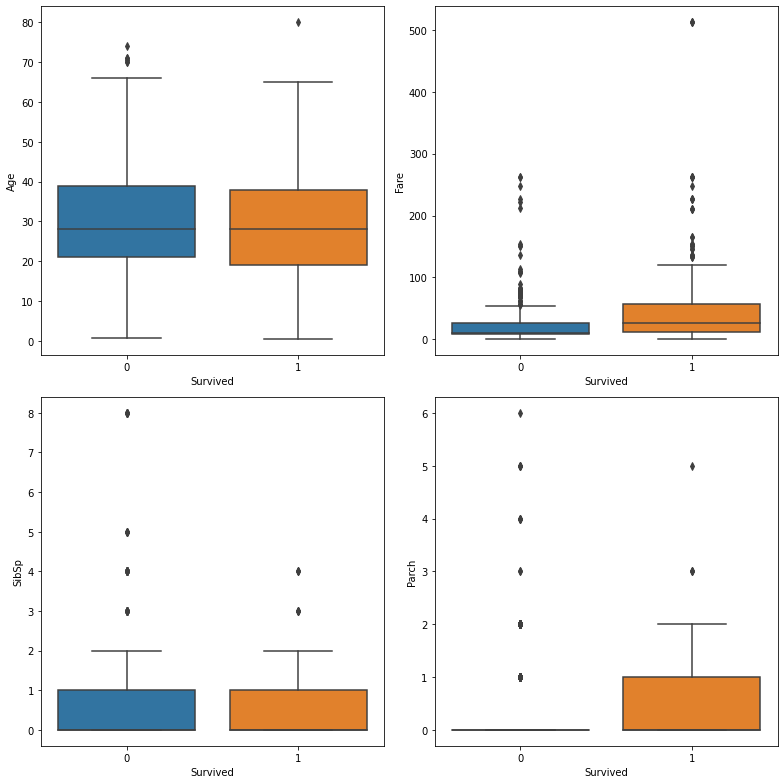

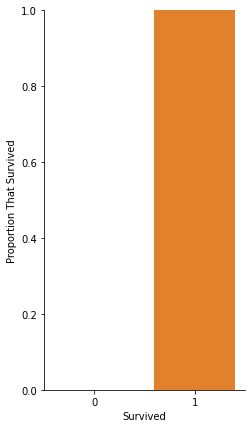

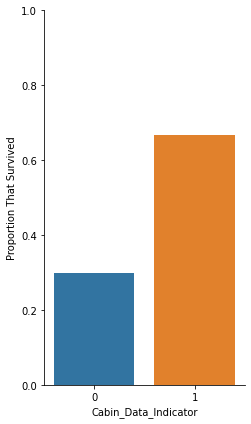

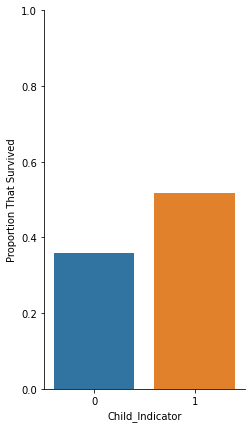

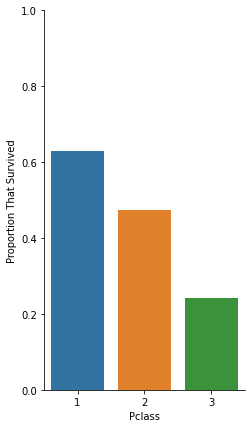

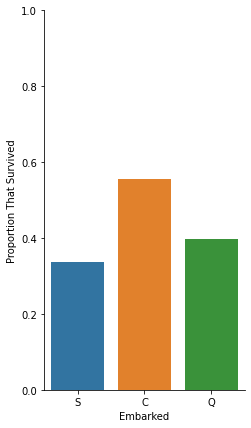

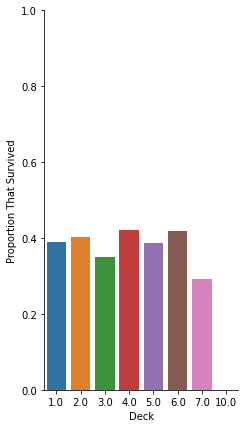

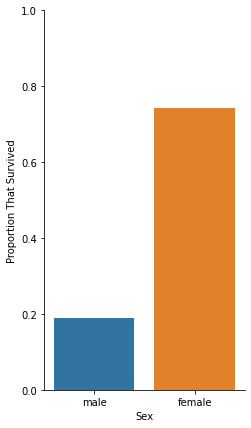

In [10]:
# Numeric Variable Visualizations

fig, ax = plt.subplots(2, 2, figsize=(11, 11))

for var, subplot in zip(numeric_variables, ax.flatten()):
         sns.boxplot(x = 'Survived', y = var, data=titanic_training_data_cleaned, ax=subplot)

fig.tight_layout()

# Indicator Variable Visualizations

for var, subplot in zip(indicator_variables, ax.flatten()):
    g = sns.catplot(
        data = titanic_training_data_cleaned, 
        x = var, 
        y = "Survived",
        kind = "bar",
        height = 6,
        aspect = 0.6,
        ci = None)

    g.set_axis_labels(var, "Proportion That Survived")
    g.set(ylim = (0,1))

fig.tight_layout()



# Categorical Variable Visualizations
for var, subplot in zip(categorical_variables, ax.flatten()):
    g = sns.catplot(
        data = titanic_training_data_cleaned, 
        x = var, 
        y = "Survived",
        kind = "bar",
        height = 6,
        aspect = 0.6,
        ci = None)

    g.set_axis_labels(var, "Proportion That Survived")
    g.set(ylim = (0,1))

fig.tight_layout()




### Random Forest

First, we need to conduct data cleaning exercises that will be needed only for the Random Forest data model.  We will complete these exercises in a copy of the training dataset so that we don't impact other subsequent data anlayses.

In [11]:
# Create a copy of the training dataset
rf_training_validation_df = titanic_training_data_cleaned.copy(deep=True)

# Drop variables from the training dataset that we do not want to be included in the Random Forest model
rf_training_validation_df.drop(['PassengerId', 'Name', 'Ticket'], axis=1, inplace=True)

# Encode the sex and embarked variables
rf_training_validation_df['Female_Indicator'] = np.where(rf_training_validation_df['Sex'] == 'female', 1, 0)
rf_training_validation_df.drop(['Sex'], axis=1, inplace=True)

rf_training_validation_df['Embarked_C_Indicator'] = np.where(rf_training_validation_df['Embarked'] == 'C', 1, 0)
rf_training_validation_df['Embarked_Q_Indicator'] = np.where(rf_training_validation_df['Embarked'] == 'Q', 1, 0)
rf_training_validation_df.drop(['Embarked'], axis=1, inplace=True)

Next, we will use our training and validation datasets to conduct hyperparameter tuning to find the best hyperparameters for random forest modeling.

In [12]:

# Import Required Modules
#pip install graphviz
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, ConfusionMatrixDisplay
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from scipy.stats import randint
from sklearn.tree import export_graphviz
from IPython.display import Image
import graphviz

# Split the training dataset into predictor and outcome components
rf_train_validation_x = rf_training_validation_df.drop('Survived', axis=1)
rf_train_validation_y = rf_training_validation_df['Survived']

# Split the Kaggle Titanic training data into training and validation components
rf_x_train, rf_x_validation, rf_y_train, rf_y_validation = train_test_split(rf_train_validation_x,
                                                                      rf_train_validation_y, 
                                                                            test_size=0.2, 
                                                                           random_state = 1)

# Conduct hyperparameter tuning for random forest models
param_dist = {'n_estimators': randint(10,500),
              'max_depth': randint(1,20),
             'max_features': randint(1,11),
             'criterion': ("gini", "entropy")}

rf = RandomForestClassifier()

rand_search = RandomizedSearchCV(rf, 
                                 param_distributions = param_dist, 
                                 n_iter=5, 
                                 cv=5)

rand_search.fit(rf_x_train, rf_y_train)

# Create a variable for the best model
best_rf = rand_search.best_estimator_

# Print the best hyperparameters
print('Best hyperparameters:',  rand_search.best_params_)

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=5,
                   param_distributions={'criterion': ('gini', 'entropy'),
                                        'max_depth': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x0000026E20F9C4C0>,
                                        'max_features': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x0000026E22B3A550>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x0000026E2106FE80>})

Best hyperparameters: {'criterion': 'gini', 'max_depth': 8, 'max_features': 4, 'n_estimators': 442}


Next, we will assess the strength of the random forest model associated with the optimal hyperparameters by applying the model to the validation dataset and observing the resulting confusion matrix, accuracy, precision, and recall.

Accuracy: 0.7877094972067039
Precision: 0.8571428571428571
Recall: 0.5753424657534246


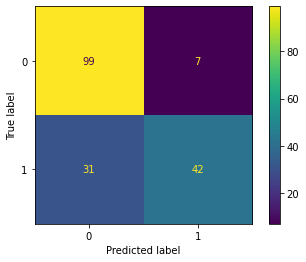

In [13]:

# Generate predictions with the best model
y_validation_predictions_rf = best_rf.predict(rf_x_validation)

# Create the confusion matrix associated with the best random forest model
cm = confusion_matrix(rf_y_validation, y_validation_predictions_rf)

ConfusionMatrixDisplay(confusion_matrix=cm).plot();

# Calculate the accuracy, precision, and recall associated with the predictions of the best random forest model

accuracy_rf_validation = accuracy_score(rf_y_validation, y_validation_predictions_rf)
precision_rf_validation = precision_score(rf_y_validation, y_validation_predictions_rf)
recall_rf_validation = recall_score(rf_y_validation, y_validation_predictions_rf)

print("Accuracy:", accuracy_rf_validation)
print("Precision:", precision_rf_validation)
print("Recall:", recall_rf_validation)


Next, we will visually display the variable importance metrics elicited from the random forest models associated with the optimal hyperparameter values.

<Figure size 864x504 with 0 Axes>

<Axes: >

Text(0.5, 1.0, 'Random Forest Model - Feature Importances ')

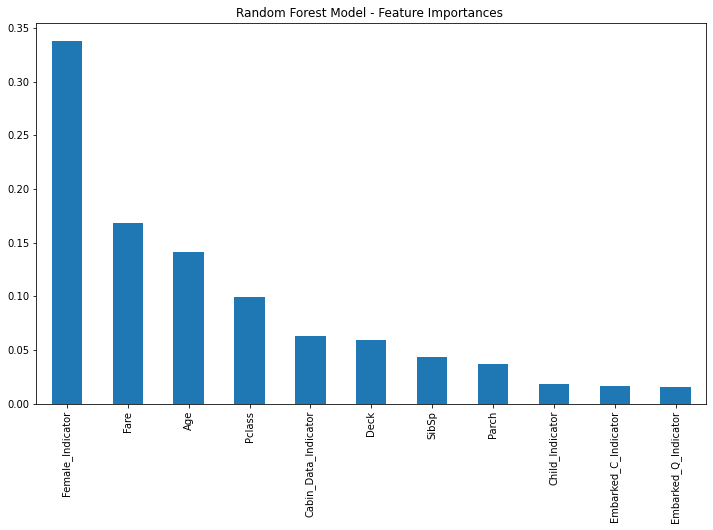

In [14]:

# Plot a bar chart to display variable importances in the random forest models associated with the best hyperparameters
feature_importances_rf_train = pd.Series(best_rf.feature_importances_, index=rf_train_validation_x.columns).sort_values(ascending=False)

plt.figure(figsize=(12,7))

feature_importances_rf_train.plot.bar()

plt.title("Random Forest Model - Feature Importances ")


## Gradient Boosted Trees

First, set up the dataset using the rf_training_validation_df that was used to fit the random forest model

In [15]:
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold, cross_val_score
from sklearn.model_selection import GridSearchCV

# Seperate the predictor variables from the the outcome variable
gbtrees_X = rf_training_validation_df.drop('Survived', axis=1)
gbtress_y = rf_training_validation_df['Survived']

First, let’s go through a simple classification example, using decision trees as the base predictors - this is the basis of an ensemble classification method so we can compare results from this simple example, manually building an ensemble to using GradientBoostingClassifier and XGBClassifier to train the ensembles more easily.

### Manual Ensemble Example

In [16]:
import numpy as np
from sklearn.tree import DecisionTreeClassifier

# fit a DecisionTreeRegressor, using default untuned parameters and max_depth=2
tree_model = DecisionTreeClassifier(max_depth=2, random_state=1)
tree_model.fit(gbtrees_X, gbtress_y)
y_pred1 = tree_model.predict(gbtrees_X)

# Accuracy Score of tree model 1
accuracy = accuracy_score(gbtress_y,y_pred1)
print('\naccuracy_score of tree model 1: ', accuracy)

# train a second DecisionTreeRegressor on the residual errors made by the first predictor:
gbtress_y2 = gbtress_y - y_pred1
tree_model2 = DecisionTreeClassifier(max_depth=2, random_state=1)
tree_model2.fit(gbtrees_X, gbtress_y2)
y_pred2 = tree_model2.predict(gbtrees_X)

# Accuracy Score of tree model 2
accuracy = accuracy_score(gbtress_y,y_pred2)
print('\naccuracy_score of tree model 2: ', accuracy)

# And then we’ll train a third regressor on the residual errors made by the second predictor
gbtress_y3 = gbtress_y2 - y_pred2
tree_model3 = DecisionTreeClassifier(max_depth=2, random_state=1)
tree_model3.fit(gbtrees_X, gbtress_y3)
y_pred3 = tree_model3.predict(gbtrees_X)

# Accuracy Score of tree model 3
accuracy = accuracy_score(gbtress_y,y_pred3)
print('\naccuracy_score of tree model 3: ', accuracy)



# ensemble containing three trees. It can make predictions on a new instance simply by adding up the predictions of all the trees
y_pred = sum(tree.predict(gbtrees_X) for tree in (tree_model, tree_model2, tree_model3))


# Accuracy Score of model
accuracy = accuracy_score(gbtress_y,y_pred)
print('\naccuracy_score of ensemble: ', accuracy)

DecisionTreeClassifier(max_depth=2, random_state=1)


accuracy_score of tree model 1:  0.7867564534231201


DecisionTreeClassifier(max_depth=2, random_state=1)


accuracy_score of tree model 2:  0.6475869809203143


DecisionTreeClassifier(max_depth=2, random_state=1)


accuracy_score of tree model 3:  0.6105499438832772

accuracy_score of ensemble:  0.8092031425364759


We see an accuracy score of 0.809 in this manual ensemble classification example with 3 trees and no hyperparameter tuning.

### Gradient Boosting Classifier and XGBoost Classifier

#### WORK IN PROGRESS......

Let's use now use a Gradient Boosting Classifier and XGBoost Classifier with hyperparamter tuning to build new classification models.


boosting specific parameters to tune:
1. n_estimators
2. Learning rate
3. subsample

tree specific parameters to tune:
1. max_depth
2. min_samples_split
3. min_samples_leaf
4. max_features

In [17]:
# Gradient boosting tunning
gb_model = GradientBoostingClassifier(random_state = 1)

# Set up 10-fold cross-validation to find the best hyperparameters from the grid below
cv = KFold(n_splits=10, random_state=1, shuffle=True)
gb_param_grid = {
              # Boosting Parameters
              'n_estimators' : [80,100,200], ### number of sequential trees to be modeled
              'learning_rate': [0.01, 0.1, 0.5], ### impact of each tree on the final outcome 
              'subsample': [0.8,1], # fraction of observations to be selected for each tree
              
              # Tree-Specific Parameters
              'max_depth': [4, 6, 8, 10], ### maximum depth of a tree
              #'min_samples_split': [50,100,150,200], ### minimum samples (or observations) required in a node to be considered for splitting
              #'min_samples_leaf': [100,150], ### minimum samples (or observations) required in a terminal node
              #'max_features': [1,2,3] ### number of features to consider while searching for a best split
              }

# set GridSearchCV parameters
gb = GridSearchCV(gb_model,param_grid = gb_param_grid, cv=cv, scoring="accuracy", n_jobs= -1, verbose = 1)
# fit the model using parms from GridSearch
gb.fit(gbtrees_X, gbtress_y)

# Create a variable for the best model
gb_tuned_model = gb.best_estimator_

print('Gradient Boosting...')
print('\nGradient Boost accuracy score: ', gb.best_score_)
print('\nGradient Boost parameters: ', gb.best_params_)

Fitting 10 folds for each of 72 candidates, totalling 720 fits


GridSearchCV(cv=KFold(n_splits=10, random_state=1, shuffle=True),
             estimator=GradientBoostingClassifier(random_state=1), n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.1, 0.5],
                         'max_depth': [4, 6, 8, 10],
                         'n_estimators': [80, 100, 200],
                         'subsample': [0.8, 1]},
             scoring='accuracy', verbose=1)

Gradient Boosting...

Gradient Boost accuracy score:  0.821598002496879

Gradient Boost parameters:  {'learning_rate': 0.01, 'max_depth': 4, 'n_estimators': 200, 'subsample': 0.8}


GradientBoostingClassifier(learning_rate=0.01, max_depth=4, n_estimators=200,
                           random_state=1, subsample=0.8)

<Figure size 864x360 with 0 Axes>

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 [Text(0, 0, 'Female_Indicator'),
  Text(1, 0, 'Fare'),
  Text(2, 0, 'Pclass'),
  Text(3, 0, 'Age'),
  Text(4, 0, 'Cabin_Data_Indicator'),
  Text(5, 0, 'SibSp'),
  Text(6, 0, 'Deck'),
  Text(7, 0, 'Parch'),
  Text(8, 0, 'Embarked_Q_Indicator'),
  Text(9, 0, 'Embarked_C_Indicator'),
  Text(10, 0, 'Child_Indicator')])

Text(0.5, 1.0, 'Gradient Boosting Classifier Feature importance')

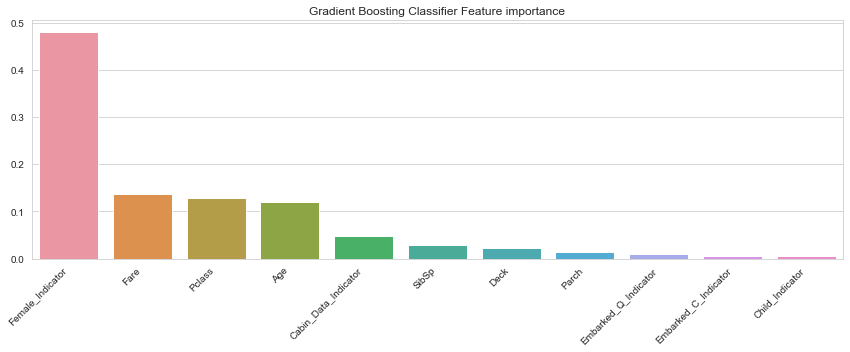

In [49]:
# Calculate feature importances
importances = gb_tuned_model.feature_importances_

# Visualize Feature Importance
# Sort feature importances in descending order
indices = np.argsort(importances)[::-1]

# Rearrange feature names so they match the sorted feature importances
names = [gbtrees_X.columns[i] for i in indices]

plt.figure(figsize = (12, 5))
sns.set_style("whitegrid")
chart = sns.barplot(x = names, y=importances[indices])
plt.xticks(rotation=45, horizontalalignment='right', fontweight='light')
plt.title('Gradient Boosting Classifier Feature importance')
plt.tight_layout()

We can see that female indicator, fare, pclass, and age appear to be the most important predictors of survival in this model

Calculate ROC and precision-recall curves for the model

Score: 0.8653198653198653


Text(0.5, 1.0, 'Gradient Boosting ROC Curve')

The roc auc score is: 0.9282427379925222


Text(0.5, 1.0, 'Gradient Boosting Precision-Recall Curve')

The prec-recall auc score is: 0.9151854117222266


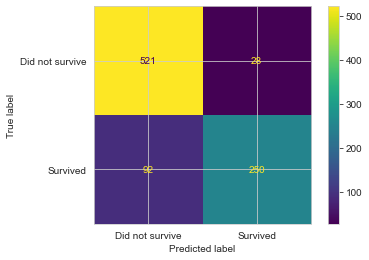

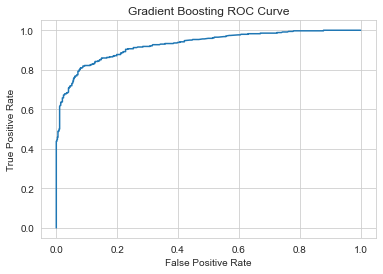

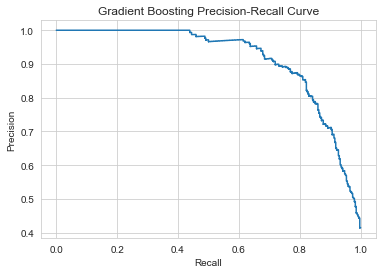

In [52]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import RocCurveDisplay
from sklearn.metrics import precision_recall_curve, auc
from sklearn.metrics import PrecisionRecallDisplay
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, roc_curve

print('Score:',gb_tuned_model.score(gbtrees_X, gbtress_y))

predictions = gb_tuned_model.predict(gbtrees_X)
probabilities = gb_tuned_model.predict_proba(gbtrees_X)[:,1]

# Confusion
cm = confusion_matrix(gbtress_y, predictions)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Did not survive','Survived'])
disp.plot()


# Curves

fpr, tpr, _ = roc_curve(gbtress_y, probabilities)
roc_display = RocCurveDisplay(fpr=fpr, tpr=tpr).plot()
plt.title('Gradient Boosting ROC Curve')
# roc auc score
auc1 = roc_auc_score(gbtress_y, probabilities)
print("The roc auc score is:", auc1)

prec, recall, _ = precision_recall_curve(gbtress_y, probabilities)
pr_display = PrecisionRecallDisplay(precision=prec, recall=recall).plot()
plt.title('Gradient Boosting Precision-Recall Curve')# precision-recall auc score
auc2 = auc(recall, prec)
print("The prec-recall auc score is:", auc2)

We suspect that the model is overfitting the data, given the high accuracy and AUC scores for the ROC and precision-recall curves

In [63]:
# XGBoost boosting tunning
xgb_model = XGBClassifier(random_state = 1)


# Set up 10-fold cross-validation to find the best hyperparameters from the grid below
cv = KFold(n_splits=10, random_state=1, shuffle=True)
xgb_param_grid = {
                'learning_rate' : [0.01, 0.1, 0.5],
                'gamma'         : [0, 0.4, 0.8],
                'max_depth'     : [2, 4, 6],
                'reg_lambda'    : [0, 0.1, 1],
                'reg_alpha'     : [0.1, 1]
              }


# set GridSearchCV parameters
xgb = GridSearchCV(xgb_model,param_grid = xgb_param_grid, cv=cv, scoring="accuracy", n_jobs= -1, verbose = 1)

# fit the model using parms from GridSearch
xgb.fit(gbtrees_X, gbtress_y)

# Create a variable for the best model
xgb_tuned_model = xgb.best_estimator_

print('Gradient Boosting...')
print('\nGradient Boost accuracy score: ', xgb.best_score_)
print('\nGradient Boost parameters: ', xgb.best_params_)

Fitting 10 folds for each of 162 candidates, totalling 1620 fits


GridSearchCV(cv=KFold(n_splits=10, random_state=1, shuffle=True),
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     int...
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, 

Gradient Boosting...

Gradient Boost accuracy score:  0.8271785268414483

Gradient Boost parameters:  {'gamma': 0.4, 'learning_rate': 0.01, 'max_depth': 6, 'reg_alpha': 0.1, 'reg_lambda': 0.1}


<Figure size 864x360 with 0 Axes>

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 [Text(0, 0, 'Female_Indicator'),
  Text(1, 0, 'Pclass'),
  Text(2, 0, 'Cabin_Data_Indicator'),
  Text(3, 0, 'SibSp'),
  Text(4, 0, 'Fare'),
  Text(5, 0, 'Age'),
  Text(6, 0, 'Parch'),
  Text(7, 0, 'Embarked_Q_Indicator'),
  Text(8, 0, 'Deck'),
  Text(9, 0, 'Embarked_C_Indicator'),
  Text(10, 0, 'Child_Indicator')])

Text(0.5, 1.0, 'XGBoost. Feature importance')

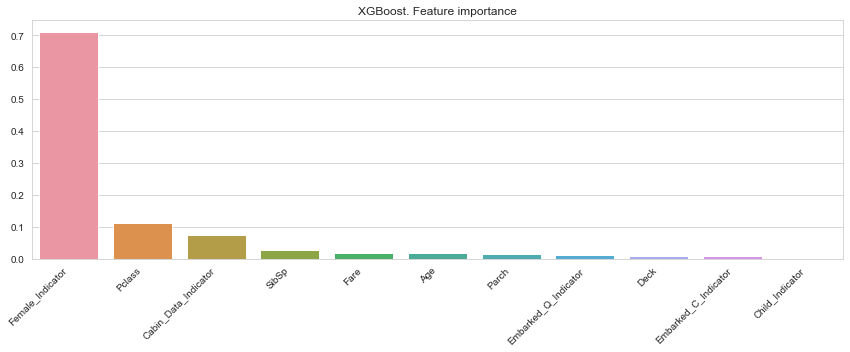

In [64]:
# Calculate feature importances
importances = xgb_tuned_model.feature_importances_

# Visualize Feature Importance
# Sort feature importances in descending order
indices = np.argsort(importances)[::-1]

# Rearrange feature names so they match the sorted feature importances
names = [gbtrees_X.columns[i] for i in indices]

plt.figure(figsize = (12, 5))
sns.set_style("whitegrid")
chart = sns.barplot(x = names, y=importances[indices])
plt.xticks(rotation=45, horizontalalignment='right', fontweight='light')
plt.title('XGBoost. Feature importance')
plt.tight_layout()

We can see the female indicator is by far the most important predictor of survival in this model.

Calculate ROC and precision-recall curves for the model

The accuracy score is: 0.8698092031425365


Text(0.5, 1.0, 'Gradient Boosting ROC Curve')

The roc auc score is: 0.9358722397980379


Text(0.5, 1.0, 'Gradient Boosting Precision-Recall Curve')

The prec-recall auc score is: 0.9238202658132498


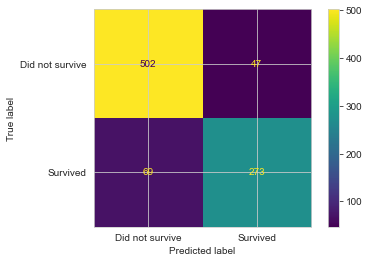

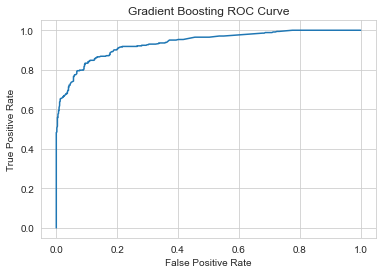

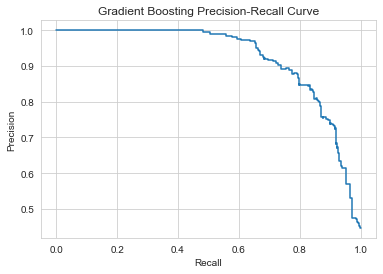

In [65]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import RocCurveDisplay
from sklearn.metrics import precision_recall_curve, auc
from sklearn.metrics import PrecisionRecallDisplay
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, roc_curve

print('The accuracy score is:', xgb_tuned_model.score(gbtrees_X, gbtress_y))

predictions = xgb_tuned_model.predict(gbtrees_X)
probabilities = xgb_tuned_model.predict_proba(gbtrees_X)[:,1]

# Confusion
cm = confusion_matrix(gbtress_y, predictions)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Did not survive','Survived'])
disp.plot()


# Curves


fpr, tpr, _ = roc_curve(gbtress_y, probabilities)
roc_display = RocCurveDisplay(fpr=fpr, tpr=tpr).plot()
plt.title('Gradient Boosting ROC Curve')
# roc auc score
auc1 = roc_auc_score(gbtress_y, probabilities)
print("The roc auc score is:", auc1)

prec, recall, _ = precision_recall_curve(gbtress_y, probabilities)
pr_display = PrecisionRecallDisplay(precision=prec, recall=recall).plot()
plt.title('Gradient Boosting Precision-Recall Curve')# precision-recall auc score
auc2 = auc(recall, prec)
print("The prec-recall auc score is:", auc2)

## Extra Trees

First we'll setup the needed packages, and then set X and Y

In [25]:
#Load packages
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import KFold, cross_val_score
from numpy import mean

# Split the training dataset into predictor and outcome components
extratrees_x = rf_training_validation_df.drop('Survived', axis=1)
extratrees_y = rf_training_validation_df['Survived']

 To evaluate the model, we will use 10-fold cross validation with accuracy as the evaluation metric:

In [26]:
clf = ExtraTreesClassifier(n_estimators=100, random_state=1)
# evaluate using cross-validation
cv = KFold(n_splits=10, random_state=1, shuffle=True)
scores = cross_val_score(clf, extratrees_x, extratrees_y, scoring='accuracy', cv=cv, n_jobs=-1)
print('Accuraccy: ', mean(scores))

Accuraccy:  0.7946566791510612


In [27]:
from sklearn.model_selection import GridSearchCV
cv = KFold(n_splits=10, random_state=1, shuffle=True)
parameters = {
    'n_estimators' : [100, 200, 500],
    'min_samples_leaf': [5,10,20],
    'max_features': [2,3,4]

}
clf = GridSearchCV(ExtraTreesClassifier(), param_grid=parameters, cv=cv)
clf.fit(extratrees_x, extratrees_y)
print(clf.best_estimator_)

GridSearchCV(cv=KFold(n_splits=10, random_state=1, shuffle=True),
             estimator=ExtraTreesClassifier(),
             param_grid={'max_features': [2, 3, 4],
                         'min_samples_leaf': [5, 10, 20],
                         'n_estimators': [100, 200, 500]})

ExtraTreesClassifier(max_features=2, min_samples_leaf=10, n_estimators=200)


The best set of parameters can be selected via GridSearchCV as shown above.

<i> need to do some more work here</i> - Manny

In [28]:
ypred = clf.predict(extratrees_x)

cm = confusion_matrix(extratrees_y, ypred)
print(cm)

[[520  29]
 [120 222]]


### Import and Clean Testing Dataset

Import the Titanic Testing Dataset

In [29]:
import pandas as pd
titanic_testing_data = pd.read_csv('test.csv')

# show first five rows of the data
titanic_testing_data.head(100)
# show number of columns and rows
titanic_testing_data.shape

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
95,987,3,"Tenglin, Mr. Gunnar Isidor",male,25.0,0,0,350033,7.7958,NaN,S
96,988,1,"Cavendish, Mrs. Tyrell William (Julia Florence...",female,76.0,1,0,19877,78.8500,C46,S
97,989,3,"Makinen, Mr. Kalle Edvard",male,29.0,0,0,STON/O 2. 3101268,7.9250,NaN,S
98,990,3,"Braf, Miss. Elin Ester Maria",female,20.0,0,0,347471,7.8542,NaN,S


(418, 11)

Check the testing dataset for missing values

In [30]:
# find null counts, percentage of null values, and column type
null_count = titanic_testing_data.isnull().sum()
null_percentage = titanic_testing_data.isnull().sum() * 100 / len(titanic_testing_data)
column_type = titanic_testing_data.dtypes

# show null counts, percentage of null values, and column type for columns with more than one Null value
null_summary = pd.concat([null_count, null_percentage, column_type], axis=1, keys=['Missing Count', 'Percentage Missing','Column Type'])
null_summary_only_missing = null_summary[null_count != 0].sort_values('Percentage Missing',ascending=False)
null_summary_only_missing

,Missing Count,Percentage Missing,Column Type
Cabin,327,78.229665,object
Age,86,20.574163,float64
Fare,1,0.239234,float64


Appropriately address the missing values in the testing dataframe.  Add the newly created variables as well to the testing dataframe.

In [31]:
# Create a new dataframe called titanic_training_data_cleaned so we don't modify the originally imported data
titanic_testing_data_cleaned = titanic_testing_data.copy(deep=True)

# Create new cabin-related variables that will be more useful and cleaner than the original cabin variable
titanic_testing_data_cleaned['Cabin_Data_Indicator'] = titanic_testing_data_cleaned['Cabin'].notna().astype(int)

titanic_testing_data_cleaned['First_Cabin_Deck'] = titanic_testing_data_cleaned['Cabin'].astype(str).str[0]

def conditions(s):
    if (s['First_Cabin_Deck'] == "A"):
        return 1
    elif (s['First_Cabin_Deck'] == "B"):
        return 2    
    elif (s['First_Cabin_Deck'] == "C"):
        return 3      
    elif (s['First_Cabin_Deck'] == "D"):
        return 4      
    elif (s['First_Cabin_Deck'] == "E"):
        return 5      
    elif (s['First_Cabin_Deck'] == "F"):
        return 6     
    elif (s['First_Cabin_Deck'] == "G"):
        return 7
    elif (s['First_Cabin_Deck'] == "T"):
        return 10 
    elif (s['First_Cabin_Deck'] == "n"):
        return np.nan     
    else:
        return np.nan

titanic_testing_data_cleaned['Deck'] = titanic_testing_data_cleaned.apply(conditions, axis=1)

# Drop the original Cabin variable since it has so many null values and since some passengers had more than one cabin
# making the original variable difficult to work with
titanic_testing_data_cleaned.drop(['Cabin', 'First_Cabin_Deck'],axis=1,inplace=True)

# Apply Imputation to Fill In Null Values for Missing Data Values
titanic_testing_data_cleaned.fillna(method='ffill', inplace=True)
titanic_testing_data_cleaned.fillna(method='bfill', inplace=True)

# Create a new variable indicating whether a passenger is a child
titanic_testing_data_cleaned['Child_Indicator'] = titanic_testing_data_cleaned['Age'] <= 17
titanic_testing_data_cleaned['Child_Indicator'] = titanic_testing_data_cleaned['Child_Indicator'].astype(int)



Examine whether the desired modifications to the testing dataframe applied correctly.

In [32]:
# show first five rows of the data
titanic_training_data_cleaned.head(20)
# show number of columns and rows
titanic_training_data_cleaned.shape

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Cabin_Data_Indicator,Deck,Child_Indicator
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,0,3.0,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,1,3.0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,0,3.0,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,1,3.0,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,0,3.0,0
5,6,0,3,"Moran, Mr. James",male,35.0,0,0,330877,8.4583,Q,0,3.0,0
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,S,1,5.0,0
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,S,0,5.0,1
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,S,0,5.0,0
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,C,0,5.0,1


(891, 14)

In [33]:
# find null counts, percentage of null values, and column type
null_count = titanic_training_data_cleaned.isnull().sum()
null_percentage = titanic_training_data_cleaned.isnull().sum() * 100 / len(titanic_training_data)
column_type = titanic_training_data_cleaned.dtypes

# show null counts, percentage of null values, and column type for columns with more than one Null value
null_summary = pd.concat([null_count, null_percentage, column_type], axis=1, keys=['Missing Count', 'Percentage Missing','Column Type'])
null_summary_only_missing = null_summary[null_count != 0].sort_values('Percentage Missing',ascending=False)
null_summary_only_missing

,Missing Count,Percentage Missing,Column Type


Conduct exploratory data analysis on the variables in the testing dataframe to confirm that all the values appear to be reasonable (to proactively address data value errors if needed).

,Age,Fare,SibSp,Parch
count,418.000000,418.000000,418.000000,418.000000
mean,30.125000,35.560845,0.447368,0.392344
std,13.905601,55.856972,0.896760,0.981429
min,0.170000,0.000000,0.000000,0.000000
25%,22.000000,7.895800,0.000000,0.000000
50%,27.000000,14.454200,0.000000,0.000000
75%,39.000000,31.471875,1.000000,0.000000
max,76.000000,512.329200,8.000000,9.000000


array([[<Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'Fare'}>],
       [<Axes: title={'center': 'SibSp'}>,
        <Axes: title={'center': 'Parch'}>]], dtype=object)

<Axes: title={'center': 'Pclass'}>

<Axes: title={'center': 'Embarked'}>

<Axes: title={'center': 'Deck'}>

<Axes: title={'center': 'Sex'}>

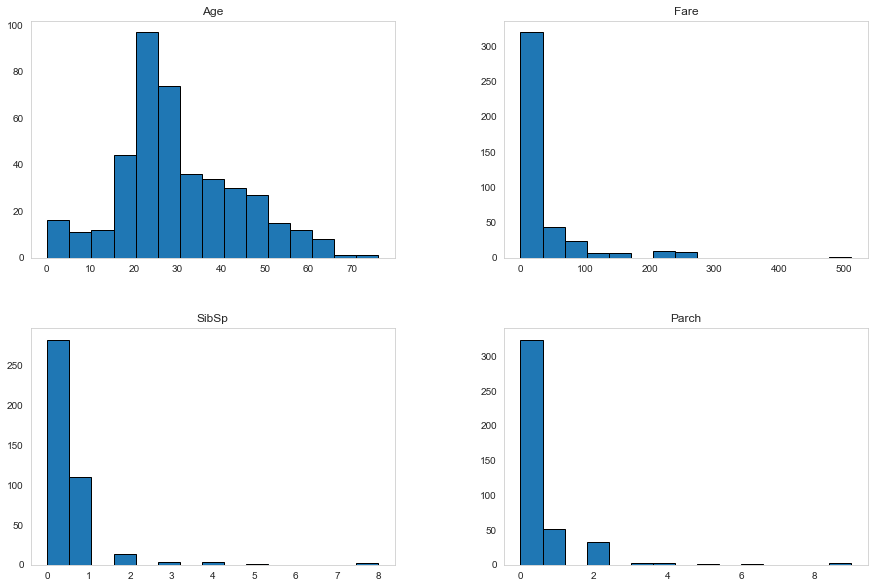

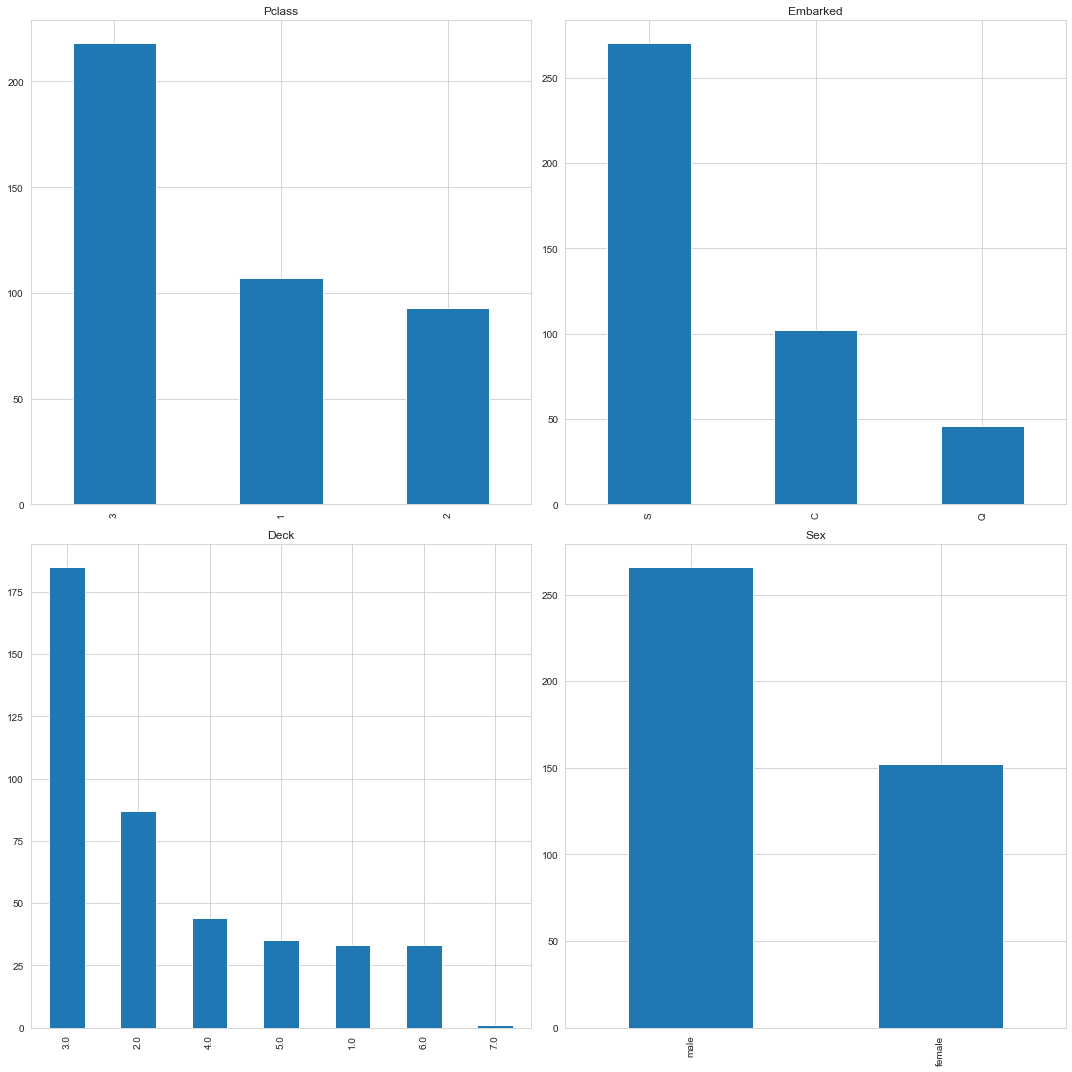

In [34]:
# Numeric Variable Visualizations
titanic_testing_data_cleaned[numeric_variables].describe()

titanic_testing_data_cleaned[numeric_variables].hist(edgecolor = 'black', 
                                             bins = 15, figsize = (15, 10),
                                             layout = (2, 2), grid = False)


    
# Categorical Variable Visualizations
fig, ax = plt.subplots(2, 2, figsize = (15, 15))
for var, subplot in zip(categorical_variables, ax.flatten()):
    titanic_testing_data_cleaned[var].value_counts().plot(kind = 'bar', ax = subplot, title = var)

fig.tight_layout()

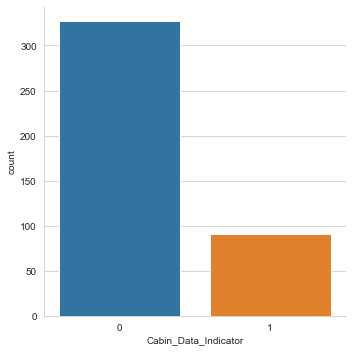

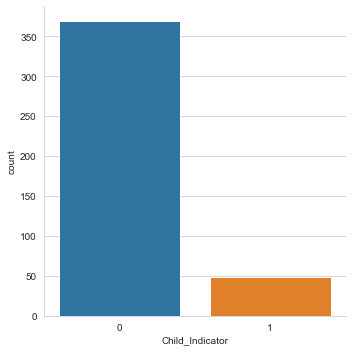

In [35]:
# Indicator Variable Visualizations
indicator_predictors = ['Cabin_Data_Indicator', 'Child_Indicator']


for var, subplot in zip(indicator_predictors, ax.flatten()):
    sns.catplot(x = var, kind = 'count', data = titanic_testing_data_cleaned)

fig.tight_layout()

### Apply Random Forest Model to Test Data

Conduct data cleaning exercises that are specific to the Random Forest Model

In [36]:
# Create a copy of the testing dataset
rf_testing_df = titanic_testing_data_cleaned.copy(deep=True)

# Drop variables from the training dataset that we do not want to be included in the Random Forest model
rf_testing_df.drop(['Name', 'Ticket'], axis=1, inplace=True)

# Encode the sex and embarked variables
rf_testing_df['Female_Indicator'] = np.where(rf_testing_df['Sex'] == 'female', 1, 0)
rf_testing_df.drop(['Sex'], axis=1, inplace=True)

rf_testing_df['Embarked_C_Indicator'] = np.where(rf_testing_df['Embarked'] == 'C', 1, 0)
rf_testing_df['Embarked_Q_Indicator'] = np.where(rf_testing_df['Embarked'] == 'Q', 1, 0)
rf_testing_df.drop(['Embarked'], axis=1, inplace=True)


Apply the Random Forest Model to the Test Dataframe

In [37]:
# Create a dataframe for predictor variables in the test dataframe for random forest model
rf_testing_x = rf_testing_df.drop(columns=['PassengerId'])

# Apply the Random Forest model to the test dataset
y_test_predictions_rf = best_rf.predict(rf_testing_x)

# Put the random forest predictions into a Pandas dataframe
prediction_df_rf = pd.DataFrame(y_test_predictions_rf, columns=['Survived'])

# Add the PassengerId column to the front of the random forest predictions dataframe
prediction_df_rf.insert(0, 'PassengerId', rf_testing_df['PassengerId'])

#output predictions to csv
prediction_df_rf.to_csv('test_predictions_random_forest_v1.csv', index=False)


Display the Kaggle Results from the Random Forest Model

<Figure size 1080x1080 with 0 Axes>

(-0.5, 1496.5, 330.5, -0.5)

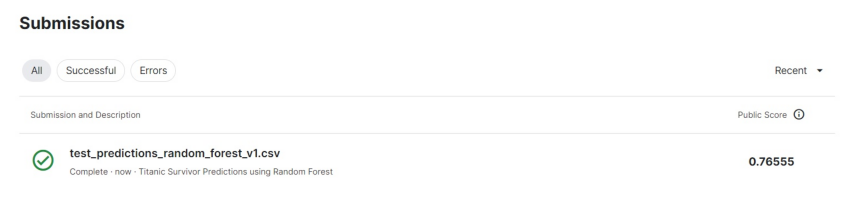

In [38]:
# Display the kaggle results associated with the Random Forest Model
plt.figure(figsize = (15, 15))
kaggle_results = plt.imread('Titanic_Random_Forest_Kaggle_Results_v1.jpg')
plt.imshow(kaggle_results)
plt.axis("off")
plt.show()

### Apply Boosting Models to Test Data

In [57]:
# Create a dataframe for predictor variables in the test dataframe for random forest model
boosting_testing_x = rf_testing_df.drop(columns=['PassengerId'])

# Apply the Random Forest model to the test dataset
y_test_predictions_gb = gb_tuned_model.predict(boosting_testing_x)

# Put the random forest predictions into a Pandas dataframe
prediction_df_gb = pd.DataFrame(y_test_predictions_gb, columns=['Survived'])

# Add the PassengerId column to the front of the random forest predictions dataframe
prediction_df_gb.insert(0, 'PassengerId', rf_testing_df['PassengerId'])

#output predictions to csv
#prediction_df_gb.to_csv('test_predictions_gb_v1.csv', index=False)


<Figure size 1080x1080 with 0 Axes>

(-0.5, 860.5, 104.5, -0.5)

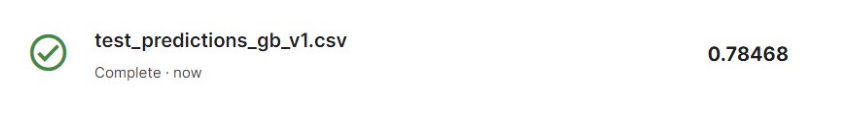

In [61]:
# Display the kaggle results associated with the Gradient Boosting Model
plt.figure(figsize = (15, 15))
kaggle_results = plt.imread('Titanic_GB_Kaggle_Results_v1.jpg')
plt.imshow(kaggle_results)
plt.axis("off")
plt.show()

In [66]:
# Apply the Random Forest model to the test dataset
y_test_predictions_xgb = xgb_tuned_model.predict(boosting_testing_x)

# Put the random forest predictions into a Pandas dataframe
prediction_df_xgb = pd.DataFrame(y_test_predictions_xgb, columns=['Survived'])

# Add the PassengerId column to the front of the random forest predictions dataframe
prediction_df_xgb.insert(0, 'PassengerId', rf_testing_df['PassengerId'])

#output predictions to csv
prediction_df_xgb.to_csv('test_predictions_xgb_v2.csv', index=False)


<Figure size 1080x1080 with 0 Axes>

(-0.5, 839.5, 101.5, -0.5)

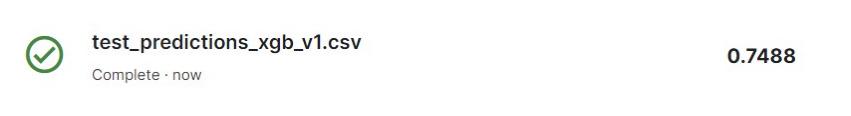

In [58]:
# Display the kaggle results associated with the Gradient Boosting Model
plt.figure(figsize = (15, 15))
kaggle_results = plt.imread('Titanic_XGB_Kaggle_Results_v1.jpg')
plt.imshow(kaggle_results)
plt.axis("off")
plt.show()

### Apply Extra Trees to Test Data
